In [1]:
library(compute.es)
library(car)
library(ggplot2)
library(multcomp)
library(pastecs)
library(WRS2)

Loading required package: carData
Loading required package: mvtnorm
Loading required package: survival
Loading required package: TH.data
Loading required package: MASS

Attaching package: 'TH.data'

The following object is masked from 'package:MASS':

    geyser



In [2]:
d <- read.csv('./Quiz_4_1.csv')

In [3]:
d

tribe,status,wealth
Yellow,Peasant,4
Yellow,Peasant,4
Blue,Peasant,4
Red,Officer,9
Blue,Chieftain,56
Yellow,Peasant,3
Yellow,Peasant,3
Red,Peasant,5
Red,Peasant,4
Yellow,Officer,13


In [4]:
leveneTest(d$wealth, d$tribe, center = mean)

,Df,F value,Pr(>F)
group,2,0.7457757,0.4746306
,997,NA,NA


In [5]:
t1way(wealth ~ tribe, data=d)

Call:
t1way(formula = wealth ~ tribe, data = d)

Test statistic: F = 1.7901 
Degrees of freedom 1: 2 
Degrees of freedom 2: 397.58 
p-value: 0.16829 

Explanatory measure of effect size: 0.08 


In [6]:
oneway.test(wealth ~ tribe, data=d)


	One-way analysis of means (not assuming equal variances)

data:  wealth and tribe
F = 1.0935, num df = 2.00, denom df = 663.65, p-value = 0.3356


No difference between tribes in general.

-----------------------

In [7]:
leveneTest(d$wealth, d$status, center = mean)

,Df,F value,Pr(>F)
group,2,441.385,5.108978e-138
,997,NA,NA


In [8]:
model <- aov(wealth ~ status, data = d)

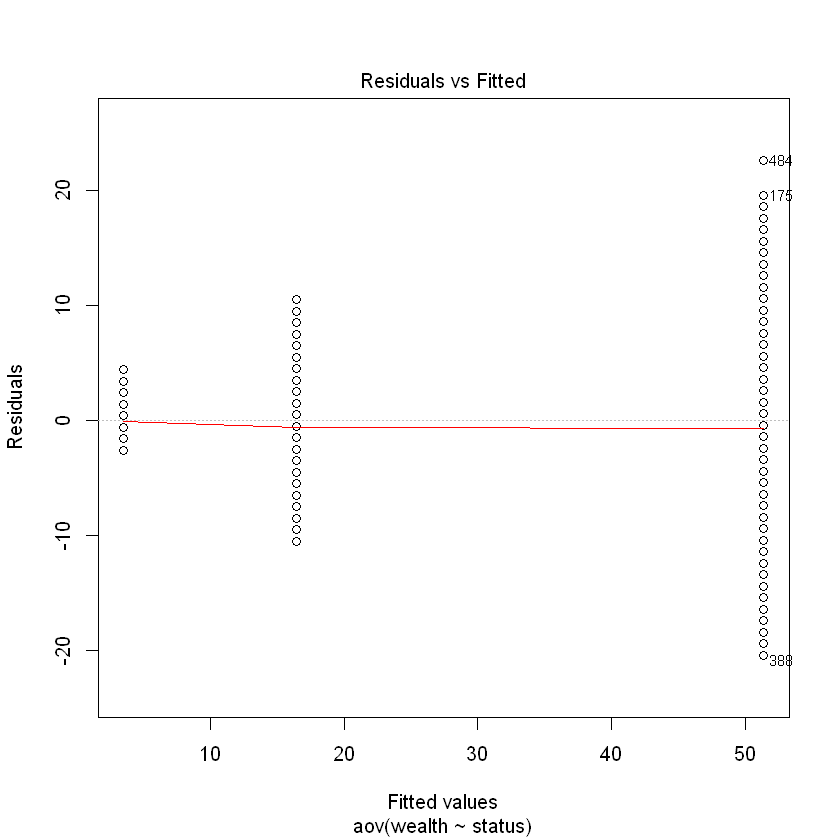

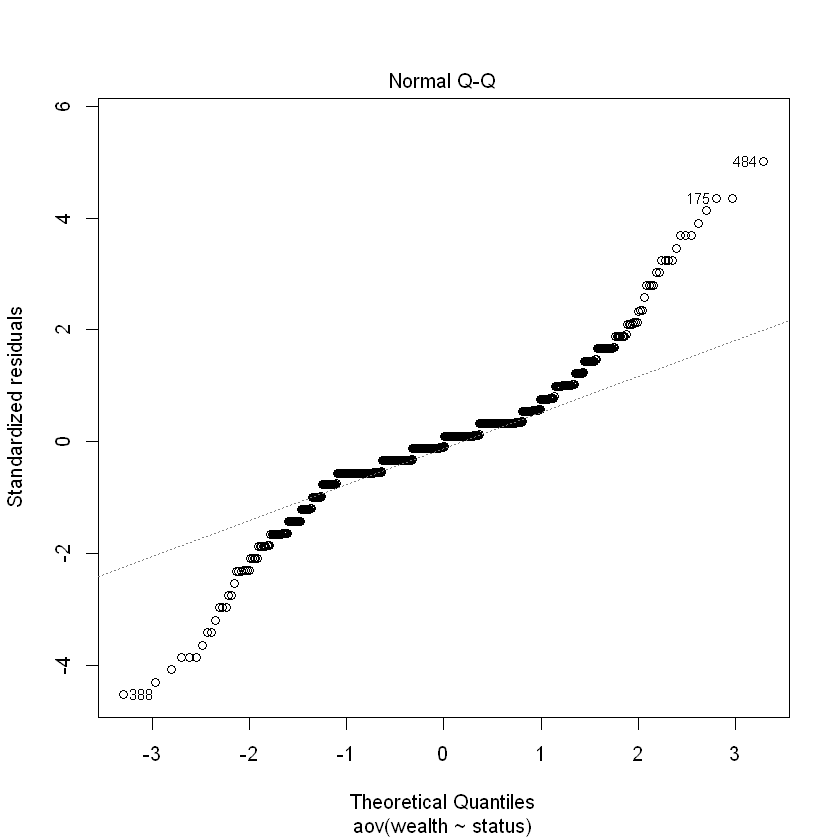

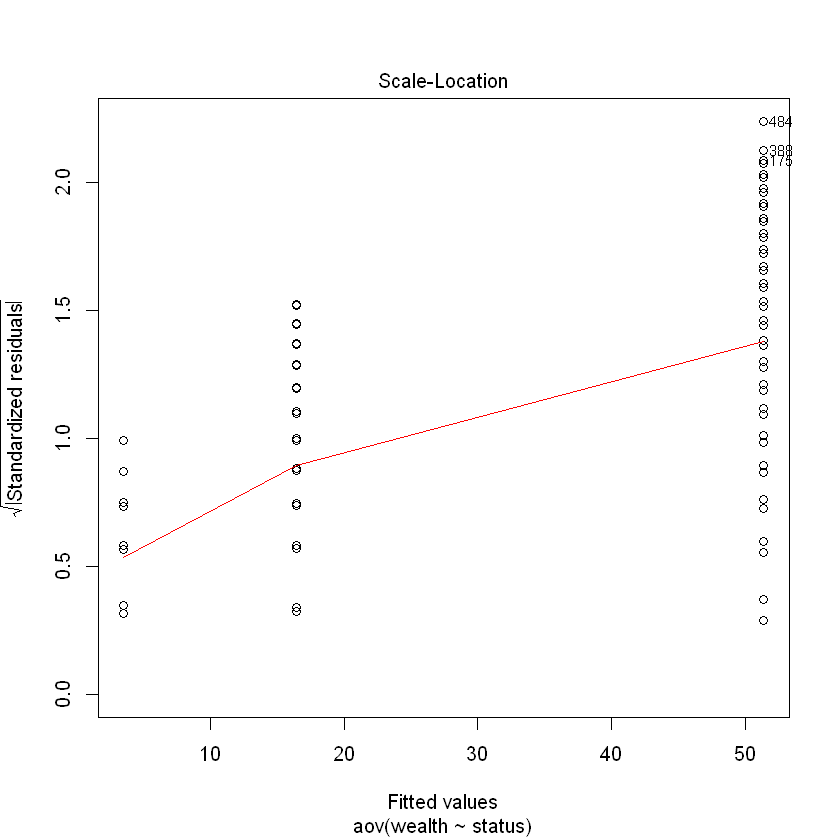

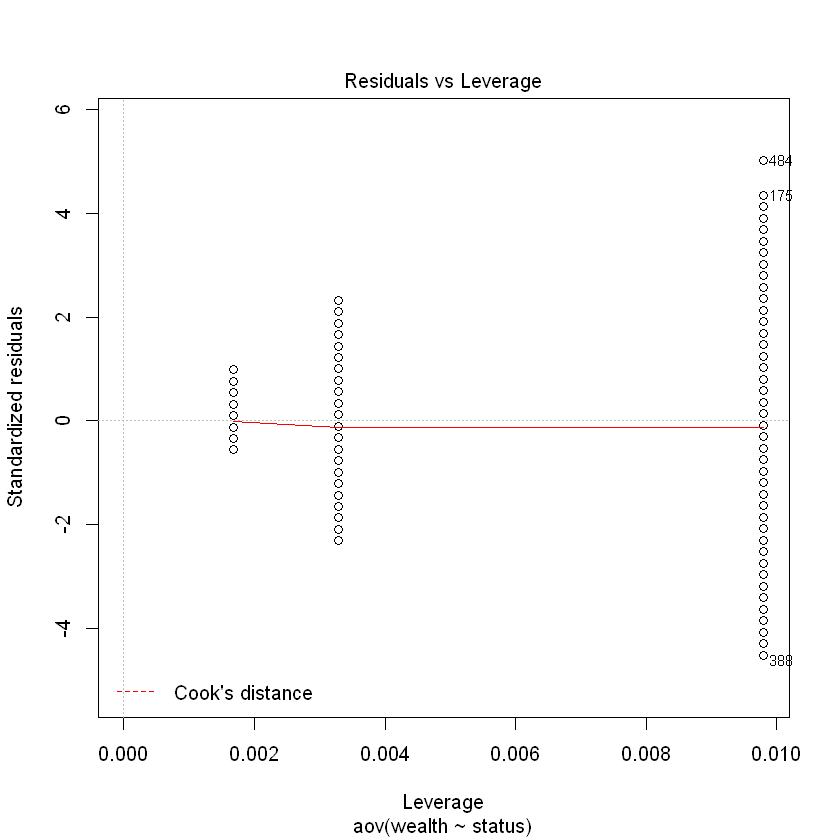

In [9]:
plot(model)

In [10]:
summary(model)

             Df Sum Sq Mean Sq F value Pr(>F)    
status        2 206616  103308    5030 <2e-16 ***
Residuals   997  20475      21                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [11]:
pairwise.t.test(d$wealth, d$status, p.adjust.method = "BH")


	Pairwise comparisons using t tests with pooled SD 

data:  d$wealth and d$status 

        Chieftain Officer
Officer <2e-16    -      
Peasant <2e-16    <2e-16 

P value adjustment method: BH 

Difference between statuses!

In [12]:
d1 <- d
d1['group'] <- paste(d$tribe, d$status)

In [13]:
d1

tribe,status,wealth,group
Yellow,Peasant,4,Yellow Peasant
Yellow,Peasant,4,Yellow Peasant
Blue,Peasant,4,Blue Peasant
Red,Officer,9,Red Officer
Blue,Chieftain,56,Blue Chieftain
Yellow,Peasant,3,Yellow Peasant
Yellow,Peasant,3,Yellow Peasant
Red,Peasant,5,Red Peasant
Red,Peasant,4,Red Peasant
Yellow,Officer,13,Yellow Officer


In [14]:
leveneTest(d1$wealth, d1$group, center = median)

Warning message in leveneTest.default(d1$wealth, d1$group, center = median):
"d1$group coerced to factor."

,Df,F value,Pr(>F)
group,8,83.7971,8.834722e-106
,991,NA,NA


In [15]:
model <- aov(wealth ~ group, data = d1)

In [16]:
summary(model)

             Df Sum Sq Mean Sq F value Pr(>F)    
group         8 208296   26037    1373 <2e-16 ***
Residuals   991  18795      19                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [17]:
pairwise.t.test(d1$wealth, d1$group, p.adjust.method = "BH")[3]

,Blue Chieftain,Blue Officer,Blue Peasant,Red Chieftain,Red Officer,Red Peasant,Yellow Chieftain,Yellow Officer
Blue Officer,1.589865e-217,NA,NA,NA,NA,NA,NA,NA
Blue Peasant,0.000000e+00,1.363787e-104,NA,NA,NA,NA,NA,NA
Red Chieftain,1.064005e-07,1.278444e-236,0.000000e+00,NA,NA,NA,NA,NA
Red Officer,2.999332e-207,1.006915e-02,8.322190e-129,2.354708e-227,NA,NA,NA,NA
Red Peasant,0.000000e+00,1.156437e-87,7.086358e-04,0.000000e+00,4.229327e-111,NA,NA,NA
Yellow Chieftain,6.166289e-02,2.768446e-183,3.472866e-300,8.744349e-12,4.865410e-173,1.228081e-290,NA,NA
Yellow Officer,2.176073e-225,1.132345e-01,1.928812e-92,1.106080e-243,3.000041e-05,7.320751e-76,8.193726e-191,NA
Yellow Peasant,0.000000e+00,3.245347e-104,6.277778e-01,0.000000e+00,7.224651e-128,1.632971e-04,3.048073e-299,2.700974e-92


Yellow Peasant    ~    Blue Peasant  
Yellow Officer    ~    Blue Officer  
Yellow Chieftain  ~    Blue Chieftain  

In [18]:
lStatus <- list()
for(status in unique(d1[,'status'])){
    lStatus <- append(lStatus, list(d1[d1$status==status,]))
}

In [19]:
by(lStatus[[1]]$wealth, lStatus[[1]]$tribe, stat.desc, basic=F)

lStatus[[1]]$tribe: Blue
      median         mean      SE.mean CI.mean.0.95          var      std.dev 
  3.00000000   3.08910891   0.09979981   0.19678892   2.01192060   1.41842187 
    coef.var 
  0.45916862 
------------------------------------------------------------ 
lStatus[[1]]$tribe: Red
      median         mean      SE.mean CI.mean.0.95          var      std.dev 
   5.0000000    4.5592417    0.1288816    0.2540674    3.5048070    1.8721130 
    coef.var 
   0.4106194 
------------------------------------------------------------ 
lStatus[[1]]$tribe: Yellow
      median         mean      SE.mean CI.mean.0.95          var      std.dev 
   3.0000000    2.8729282    0.1085760    0.2142455    2.1337630    1.4607406 
    coef.var 
   0.5084501 

Red live better!

In [20]:
by(lStatus[[3]]$wealth, lStatus[[3]]$tribe, stat.desc, basic=F)

lStatus[[3]]$tribe: Blue
      median         mean      SE.mean CI.mean.0.95          var      std.dev 
  50.0000000   50.2820513    1.2565342    2.5437205   61.5762483    7.8470535 
    coef.var 
   0.1560607 
------------------------------------------------------------ 
lStatus[[3]]$tribe: Red
      median         mean      SE.mean CI.mean.0.95          var      std.dev 
  61.0000000   55.9354839    2.1982082    4.4893401  149.7956989   12.2391053 
    coef.var 
   0.2188075 
------------------------------------------------------------ 
lStatus[[3]]$tribe: Yellow
      median         mean      SE.mean CI.mean.0.95          var      std.dev 
  47.0000000   48.3125000    1.9210409    3.9179888  118.0927419   10.8670484 
    coef.var 
   0.2249324 

**Yellow and Blue are same.   
Reds live better.**

In [21]:
pairwise.t.test(d[d$status=='Chieftain',][['wealth']], d[d$status=='Chieftain',][['tribe']], p.adjust.method = "BH")


	Pairwise comparisons using t tests with pooled SD 

data:  d[d$status == "Chieftain", ][["wealth"]] and d[d$status == "Chieftain", ][["tribe"]] 

       Blue  Red  
Red    0.037 -    
Yellow 0.424 0.012

P value adjustment method: BH 

In [22]:
i <- 1
leveneTest(lStatus[[i]]$wealth, lStatus[[i]]$tribe, center = median)

,Df,F value,Pr(>F)
group,2,6.5468,0.001540987
,591,NA,NA


In [23]:
oneway.test(lStatus[[1]]$wealth ~ lStatus[[1]]$tribe, data=d)


	One-way analysis of means (not assuming equal variances)

data:  lStatus[[1]]$wealth and lStatus[[1]]$tribe
F = 56.913, num df = 2.00, denom df = 390.52, p-value < 2.2e-16


In [24]:
t1way(lStatus[[1]]$wealth ~ lStatus[[1]]$tribe, data=d)

Call:
t1way(formula = lStatus[[1]]$wealth ~ lStatus[[1]]$tribe, data = d)

Test statistic: F = 40.1584 
Degrees of freedom 1: 2 
Degrees of freedom 2: 233.53 
p-value: 0 

Explanatory measure of effect size: 0.48 


In [26]:
length(d[d$status=='Chieftain' & d$tribe=='Yellow',1])
length(d[d$status=='Officer' & d$tribe=='Yellow',1])
length(d[d$status=='Peasant' & d$tribe=='Yellow',1])

[1] 32

[1] 99

[1] 181

In [33]:
leveneTest(d$wealth, d$tribe, center = mean)

,Df,F value,Pr(>F)
group,2,0.7457757,0.4746306
,997,NA,NA


In [32]:
leveneTest(d$wealth, d$tribe, center = median)

,Df,F value,Pr(>F)
group,2,0.1958725,0.8221487
,997,NA,NA


In [29]:
summary(aov(wealth ~ tribe, data = d1))

             Df Sum Sq Mean Sq F value Pr(>F)
tribe         2    485   242.5   1.067  0.344
Residuals   997 226606   227.3               

In [30]:
# kruskal.test(wealth ~ tribe, data = d1)